In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [6]:
data = pd.read_csv('ecommerce.csv', encoding='ISO-8859-1')
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
data = data.dropna(subset=['CustomerID'])

# Convert InvoiceDate to a datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate total expenditure for each transaction
data['TotalExpenditure'] = data['Quantity'] * data['UnitPrice']

# Aggregate data by CustomerID
customer_data = data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalExpenditure': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

customer_data.columns = ['CustomerID', 'TotalQuantity', 'TotalExpenditure', 'PurchaseFrequency']

# Select features for clustering
features = customer_data[['TotalQuantity', 'TotalExpenditure', 'PurchaseFrequency']]

# Standardizing
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


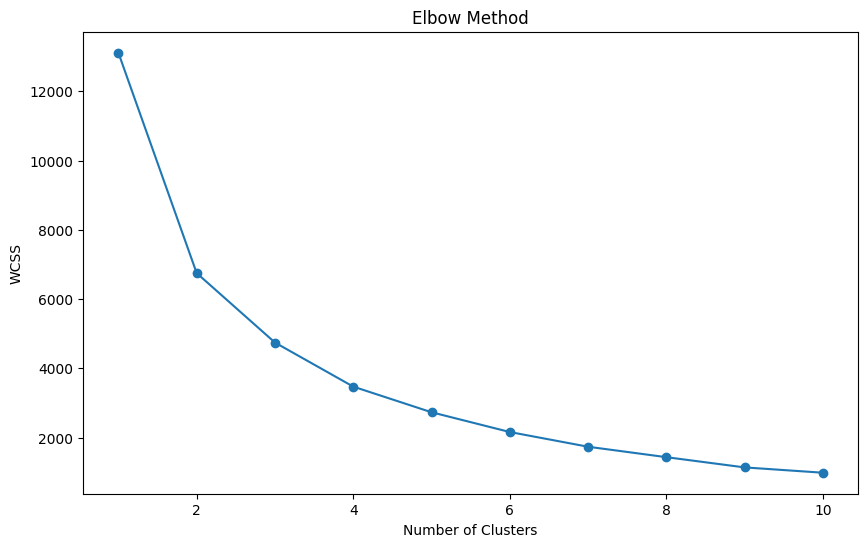

In [13]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

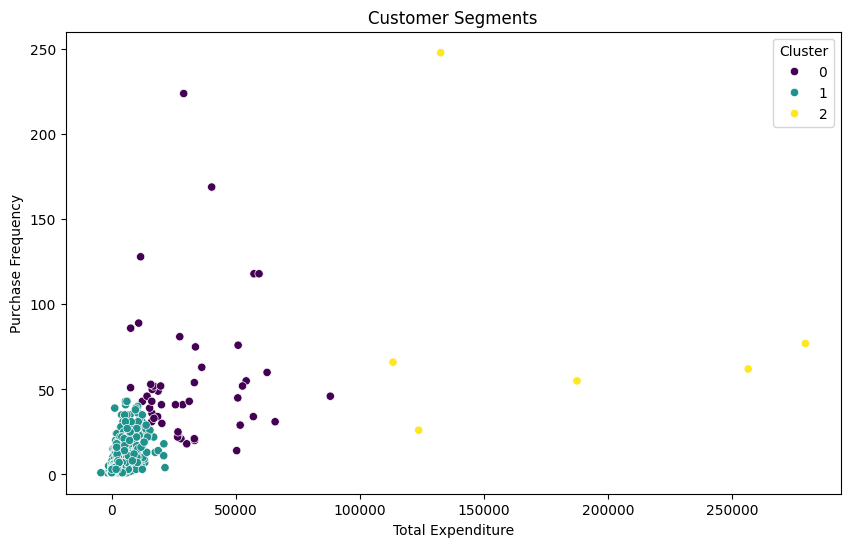

In [16]:
# Apply K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
customer_data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data['TotalExpenditure'], y=customer_data['PurchaseFrequency'], hue=customer_data['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Expenditure')
plt.ylabel('Purchase Frequency')
plt.show()
